<a href="https://colab.research.google.com/github/munisdev86/stable-diffusion/blob/main/sd_2dot1_from_bundle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Load SD model from bundle


# Load SD model from bundle


1.   Model is cloned from HF hub and uploaded to G drive.
2.   Mount the G Drive containing the model first

Clone steps



1.   git lfs install (prereq-install git-lfs in not installed already)
2.   git clone https://huggingface.co/stabilityai/stable-diffusion-2-1
1.   After download, delete the below inside the cloned model dir
2.   rm -Rf stable-diffusion-2-1/.git
2.   rm -Rf stable-diffusion-2-1/.gitattributes







In [1]:
#copy to local
!cp -R /content/drive/MyDrive/sd-models/stable-diffusion-2-1 ./

In [4]:
!du -sh stable-diffusion-2-1/

4.9G	stable-diffusion-2-1/


In [2]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-qgvz_m4a
  Running command git clone -q https://github.com/huggingface/diffusers.git /tmp/pip-req-build-qgvz_m4a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.8 MB 7.3 MB/s 
     |████████████████████████████████| 191 kB 71.1 MB/s 
     |████████████████████████████████| 33.8 MB 1.2 MB/s 
     |████████████████████████████████| 182 kB 78.7 MB/s 
     |████████████████████████████████| 7.6 MB 66.7 MB/s 
  Created wheel for diffusers: filename=diffusers-0.11.0.dev0-py3-none-any.whl size=513043 sha256=cd5230bcb28399b06f8a38d25e78004f5353bde2cee276c917aa4cbc20d7957b
  Stored in directory: /tmp/pip-ephem-wheel-cache-tvvtck6w/wheels/28/16/cf/d8d37579fd1e7edb978252d850ec9328b055a7582ddfae3b87
Success

In [3]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler, PNDMScheduler
import torch

model_id = "/content/stable-diffusion-2-1"

# Use the Euler scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
# pipe.scheduler = PNDMScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")


  0%|          | 0/50 [00:00<?, ?it/s]

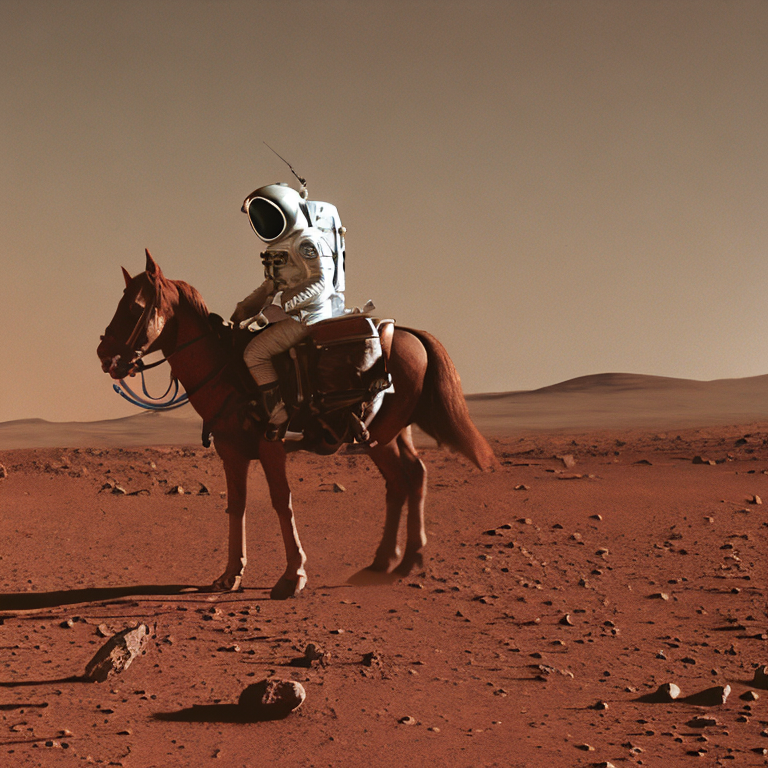

In [5]:
prompt = "a photo of an astronaut riding a horse on mars"

result = pipe(prompt)
image = result.images[0]
    
# image.save("astronaut_rides_horse.png")
image